# Считываем данные

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
otto = pd.read_csv('train.csv')
otto.info()
print(otto.index[1])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61878 entries, 0 to 61877
Data columns (total 95 columns):
id         61878 non-null int64
feat_1     61878 non-null int64
feat_2     61878 non-null int64
feat_3     61878 non-null int64
feat_4     61878 non-null int64
feat_5     61878 non-null int64
feat_6     61878 non-null int64
feat_7     61878 non-null int64
feat_8     61878 non-null int64
feat_9     61878 non-null int64
feat_10    61878 non-null int64
feat_11    61878 non-null int64
feat_12    61878 non-null int64
feat_13    61878 non-null int64
feat_14    61878 non-null int64
feat_15    61878 non-null int64
feat_16    61878 non-null int64
feat_17    61878 non-null int64
feat_18    61878 non-null int64
feat_19    61878 non-null int64
feat_20    61878 non-null int64
feat_21    61878 non-null int64
feat_22    61878 non-null int64
feat_23    61878 non-null int64
feat_24    61878 non-null int64
feat_25    61878 non-null int64
feat_26    61878 non-null int64
feat_27    61878 non-null i

In [3]:
otto.head()

,id,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,...,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93,target
0,1,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,Class_1
1,2,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,Class_1
2,3,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,Class_1
3,4,1,0,0,1,6,1,5,0,0,...,0,1,2,0,0,0,0,0,0,Class_1
4,5,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,Class_1


In [4]:
#Видим, что среди признаков нет nan-ов и единственным нецелочисленным 
#типом данных является колонка target. Исправим это.
otto_changed = otto.copy()

In [5]:
#Посмотрим на количество классов
otto_changed = pd.get_dummies(otto_changed, dummy_na=True, columns=['target'])
otto_changed.head()

,id,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,...,target_Class_1,target_Class_2,target_Class_3,target_Class_4,target_Class_5,target_Class_6,target_Class_7,target_Class_8,target_Class_9,target_nan
0,1,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
2,3,0,0,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
3,4,1,0,0,1,6,1,5,0,0,...,1,0,0,0,0,0,0,0,0,0
4,5,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [6]:
#Видим, что классов всего 9. Заменим их в колонке target
#на соответствующие целые значения
otto_changed = otto.copy()
classes = ['Class_' + str(i + 1) for i in range(9)]
classes_int = [i + 1 for i in range(9)]
otto_changed.target.replace(classes, classes_int, inplace=True)
otto_changed.head()

,id,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,...,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93,target
0,1,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
1,2,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
2,3,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
3,4,1,0,0,1,6,1,5,0,0,...,0,1,2,0,0,0,0,0,0,1
4,5,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,1


# Визуализация данных

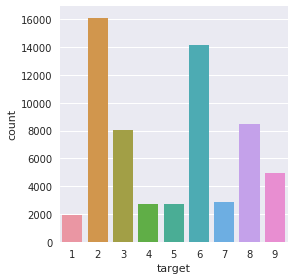

In [7]:
sns.factorplot(x="target", kind="count", data=otto_changed)
plt.show() #Посмотрим на количество каждого класса

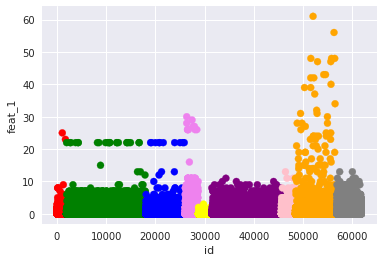

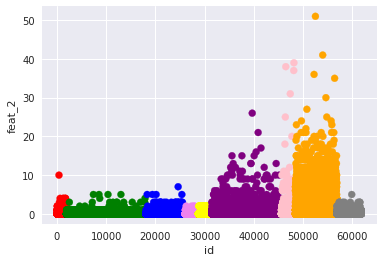

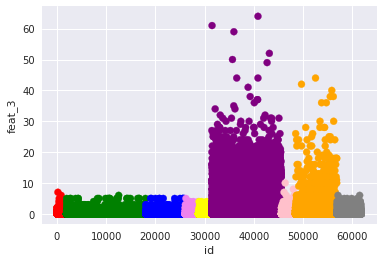

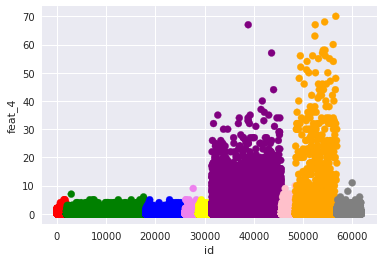

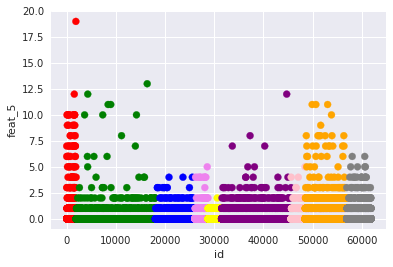

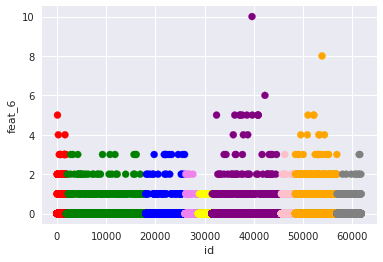

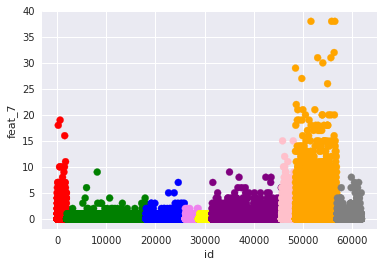

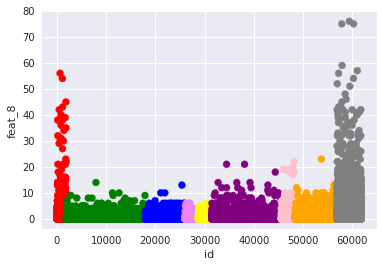

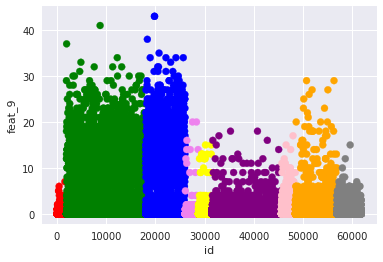

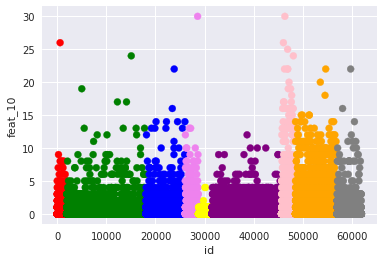

In [8]:
#Посмотрим, разделяют ли какие-то признаки классы
x = otto_changed.id
y = otto_changed.feat_1
colors = []
for i in x:
    if otto_changed.target[i - 1] == 1:
        colors.append('red')
    if otto_changed.target[i - 1] == 2:
        colors.append('green')
    if otto_changed.target[i - 1] == 3:
        colors.append('blue')
    if otto_changed.target[i - 1] == 4:
        colors.append('violet')
    if otto_changed.target[i - 1] == 5:
        colors.append('yellow')
    if otto_changed.target[i - 1] == 6:
        colors.append('purple')
    if otto_changed.target[i - 1] == 7:
        colors.append('pink')
    if otto_changed.target[i - 1] == 8:
        colors.append('orange')
    if otto_changed.target[i - 1] == 9:
        colors.append('gray')
for i in range(10):
    string = 'feat_' + str(i + 1)
    y = otto_changed[string]
    plt.scatter(x, y, c=colors)
    plt.xlabel("id")
    plt.ylabel(string)
    plt.show()

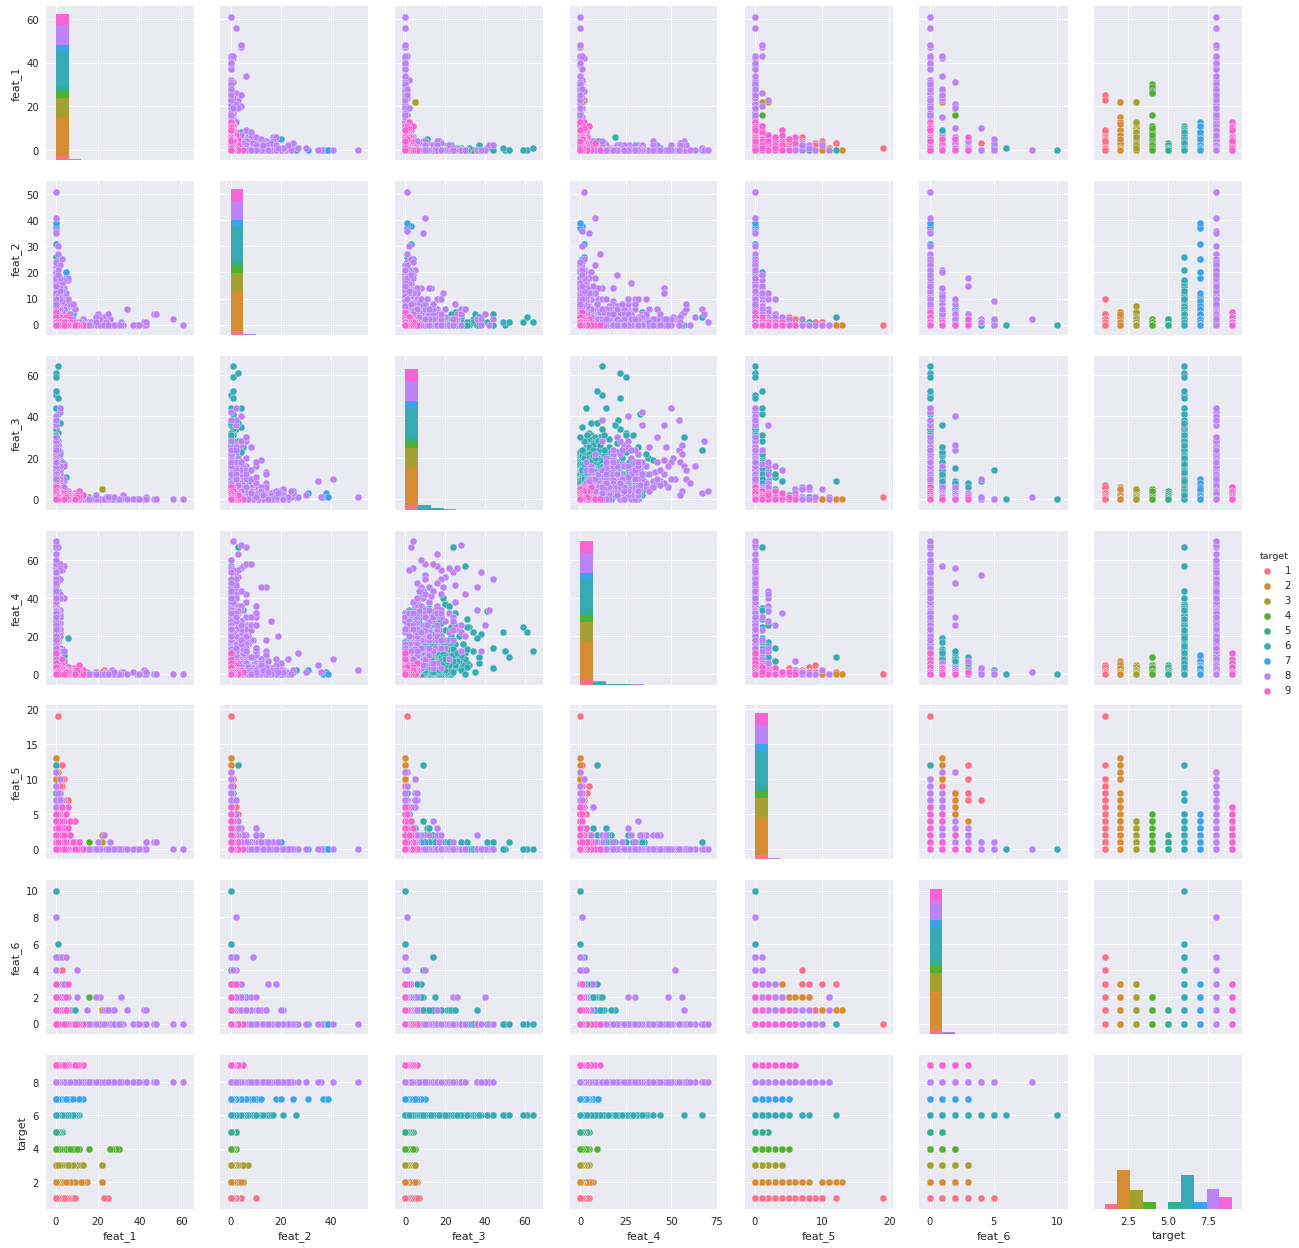

In [9]:
#По этим картинкам не видно, чтобы горизонтальные прямые разделяли бы классы
#Попробуем посмотрим на ситуацию с парными признаками
cols = ['feat_1', 'feat_2', 'feat_3', 'feat_4', 'feat_5', 'feat_6', 'target']
sns_plot = sns.pairplot(otto_changed[cols], hue="target") 
#Воспользуемся методом pairplot для того, чтобы посмотреть на одной картинке,
#как связаны между собой различные признаки. 
#Видно, что признаки очень по-разному разделяют данные

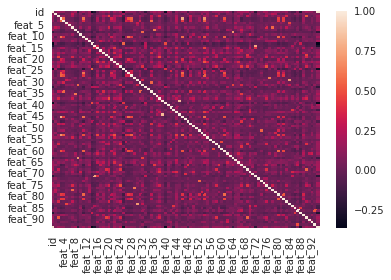

In [10]:
corr_matrix = otto_changed.corr()
sns.heatmap(corr_matrix)
#Построим матрицу корреляцией. 
#Видим, что есть скоррелированные признаки, указанные красным на фоне 
#доминирующего фиолетового цвета

# Обучение модели и кросс-валидация

In [11]:
import numpy as np
import math
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.metrics import log_loss, accuracy_score
#Попробуем воспользоваться алгоритмом логистической регрессии
#Я не нашёл, как реализовывается logloss-метрика для многоклассовой
#классификации, поэтому написал свою по формуле из Kaggle
eps = 10e-15
def my_logloss(y_test, proba_pred):
    x = 0
    N = len(y_test)
    classes = 9
    for i in range(N):
        ind = y_test.index[i]
        for j in range(classes):
            if y_test[ind] == j:
                a = max(min(proba_pred[i][j], 1 - eps), eps)
                x -= math.log(a)
    x /= N
    return(x)
X = otto_changed.drop(['target', 'id'], axis=1)
y = otto_changed.target
clf = LogisticRegression()
clf.fit(X, y)
y_pred = clf.predict(X)
proba_pred = clf.predict_proba(X)
print('Ошибка при обучении на всей выборке в log-loss метрике - {0}, в accuracy метрике - {1}'.
format(my_logloss(y, proba_pred), 1 - accuracy_score(y, y_pred)))


Ошибка при обучении на всей выборке в log-loss метрике - 4.958430917531141, в accuracy метрике - 0.24263874074792335


In [12]:
#Попробуем обучиться со столбцом id
X = otto_changed.drop('target', axis=1)
y = otto_changed.target
clf = LogisticRegression()
clf.fit(X, y)
y_pred = clf.predict(X)
proba_pred = clf.predict_proba(X)
print('Ошибка при обучении на всей выборке в log-loss метрике - {0}, в accuracy метрике - {1}'.
format(my_logloss(y, proba_pred), 1 - accuracy_score(y, y_pred)))
#Ошибка увеличилась, видимо, имеет место переобучение. Будем иметь это в виду
#при предсказании на тесте

Ошибка при обучении на всей выборке в log-loss метрике - 3.7268701853896644, в accuracy метрике - 0.19974789101134494


In [13]:
from sklearn.model_selection import train_test_split
#Попробуем разбить данные случайным образом в соотношении обучение-тест как 8:2
#без обучение по id
X = otto_changed.drop(['target', 'id'], axis=1)
y = otto_changed.target
X_train, X_test, y_train, y_test = train_test_split(X, 
                            y, test_size=0.2, stratify=None, random_state=0)
clf = LogisticRegression()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
proba_pred = clf.predict_proba(X_test)
print('Ошибка на тесте в log-loss метрике - {0}, в accuracy метрике - {1}'.
format(my_logloss(y_test, proba_pred), 1 - accuracy_score(y_test, y_pred)))
#Видим, что ошибка на тесте немного увеличилась

Ошибка на тесте в log-loss метрике - 4.976588031894163, в accuracy метрике - 0.24628312863606983


In [14]:
#А теперь аналогичный результат с обучением по столбцу id
X = otto_changed.drop('target', axis=1)
y = otto_changed.target
X_train, X_test, y_train, y_test = train_test_split(X, 
                            y, test_size=0.2, stratify=None, random_state=0)
clf = LogisticRegression()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
proba_pred = clf.predict_proba(X_test)
print('Ошибка на тесте в log-loss метрике - {0}, в accuracy метрике - {1}'.
format(my_logloss(y_test, proba_pred), 1 - accuracy_score(y_test, y_pred)))
#Ошибка на тесте тем не менее оказалась меньше, при учитывании столбца id

Ошибка на тесте в log-loss метрике - 3.6996534103239678, в accuracy метрике - 0.20329670329670335


In [15]:
#Теперь попробуем разбивать данные с помощью Kfold
#Так как параметр scoring в функции cross_val_score имеет только
#определённые значения из списка, в котором log_loss метрика реализована
#только для бинарной классификации и я не смог вставить туда свою функцию
#my_logloss, то будем выбирать scoring = accuracy
from sklearn.model_selection import cross_val_score, KFold
kfold = KFold(n_splits = 5)
cv = kfold.split(X, y)
X = otto_changed.drop('target', axis=1)
y = otto_changed.target
clf = LogisticRegression()
scores = 1 - cross_val_score(clf, X, y, scoring='accuracy', cv=cv)
print(scores)
print('Средний результат в Kfold-алгоритме: {0:.4f} ± {1:.4f}'.format(scores.mean(), scores.std()))

[0.52723012 0.62871687 0.52989657 0.30521212 0.5869899 ]
Средний результат в Kfold-алгоритме: 0.5156 ± 0.1118


In [16]:
#Точность предсказаний сильно упала и понятно почему - все данные,
#идущие последовательно, имеют значения классов, 
#расположенных по порядку - от 1 до 9. Для того, чтобы исправить это,
#выставим параметр shuffle = True, который отвечает за перемешивание
kfold = KFold(n_splits=5, shuffle=True) 
cv = kfold.split(X, y) 
X = otto_changed.drop('target', axis=1)
y = otto_changed.target
clf = LogisticRegression()
scores = 1 - cross_val_score(clf, X, y, scoring='accuracy', cv=cv)
print(scores)
print('Средний результат в Kfold-алгоритме: {0:.4f} ± {1:.4f}'.format(scores.mean(), scores.std()) )

[0.20386231 0.19659017 0.2032967  0.2050101  0.19911111]
Средний результат в Kfold-алгоритме: 0.2016 ± 0.0032


In [17]:
#попробуем аналогично сделать для обучения без учёта id
kfold = KFold(n_splits=5, shuffle=True) 
cv = kfold.split(X, y) 
X = otto_changed.drop(['target', 'id'], axis=1)
y = otto_changed.target
clf = LogisticRegression()
scores = 1 - cross_val_score(clf, X, y, scoring='accuracy', cv=cv)
print(scores)
print('Средний результат в Kfold-алгоритме: {0:.4f} ± {1:.4f}'.format(scores.mean(), scores.std()) )
#В accuracy-метрике точность при обучении с использованием id оказалась лучше
#Но это не гарантирует улучшения точности в log-loss метрике.
#Так что при тесте будем рассматривать оба случая.

[0.24191984 0.2447479  0.25040401 0.24113131 0.24517172]
Средний результат в Kfold-алгоритме: 0.2447 ± 0.0033


In [19]:
#Наконец, попробуем сгруппировать folds по какому-то признаку
from sklearn.model_selection import GroupKFold
group_kfold = GroupKFold(n_splits=5)
cv = group_kfold.split(X, y, groups=otto_changed.feat_1)
X = otto_changed.drop('target', axis=1)
y = otto_changed.target
scores = 1 - cross_val_score(clf, X, y, scoring='accuracy', cv=cv)
print('Средний результат в Kfold-алгоритме: {0:.4f} ± {1:.4f}'.format(scores.mean(), scores.std()) )
#Средний результат несильно изменился, увеличилась лишь дисперсия.

Средний результат в Kfold-алгоритме: 0.2032 ± 0.0304


In [20]:
#Аналогичная проверка без обучения по id
group_kfold = GroupKFold(n_splits=5)
cv = group_kfold.split(X, y, groups=otto_changed.feat_1)
X = otto_changed.drop(['target', 'id'], axis=1)
y = otto_changed.target
clf = LogisticRegression()
scores = 1 - cross_val_score(clf, X, y, scoring='accuracy', cv=cv)
print('Средний результат в Kfold-алгоритме: {0:.4f} ± {1:.4f}'.format(scores.mean(), scores.std()) )
#Результат улучшился на 1 процент

Средний результат в Kfold-алгоритме: 0.2365 ± 0.0359


In [24]:
#Попробуем поставить параметр в классификаторе penalty = 'l1'
clf = LogisticRegression(penalty = 'l1')
kfold = KFold(n_splits=5, shuffle=True) 
X = otto_changed.drop('target', axis=1)
y = otto_changed.target
cv = kfold.split(X, y) 
scores = 1 - cross_val_score(clf, X, y, scoring='accuracy', cv=cv)
print(scores)
print('Средний результат в Kfold-алгоритме: {0:.4f} ± {1:.4f}'.format(scores.mean(), scores.std()) )
#Вау, результат улучшился в 2 раза! Будем пробовать 
#l1-регуляризацию на итоговом тесте

[0.09785068 0.09776988 0.09841629 0.0939798  0.09810101]
Средний результат в Kfold-алгоритме: 0.0972 ± 0.0016


In [25]:
#Аналогично для обучения без id
clf = LogisticRegression(penalty = 'l1')
kfold = KFold(n_splits=5, shuffle=True) 
X = otto_changed.drop(['target', 'id'], axis=1)
y = otto_changed.target
cv = kfold.split(X, y) 
scores = 1 - cross_val_score(clf, X, y, scoring='accuracy', cv=cv)
print(scores)
print('Средний результат в Kfold-алгоритме: {0:.4f} ± {1:.4f}'.format(scores.mean(), scores.std()) )
#Хотя в этом случае l1-регуляризация несильно помогла

[0.23828378 0.24789916 0.25484809 0.24339394 0.2409697 ]
Средний результат в Kfold-алгоритме: 0.2451 ± 0.0058


# Результаты на тесте

In [26]:
otto_test = pd.read_csv('test.csv')
otto_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144368 entries, 0 to 144367
Data columns (total 94 columns):
id         144368 non-null int64
feat_1     144368 non-null int64
feat_2     144368 non-null int64
feat_3     144368 non-null int64
feat_4     144368 non-null int64
feat_5     144368 non-null int64
feat_6     144368 non-null int64
feat_7     144368 non-null int64
feat_8     144368 non-null int64
feat_9     144368 non-null int64
feat_10    144368 non-null int64
feat_11    144368 non-null int64
feat_12    144368 non-null int64
feat_13    144368 non-null int64
feat_14    144368 non-null int64
feat_15    144368 non-null int64
feat_16    144368 non-null int64
feat_17    144368 non-null int64
feat_18    144368 non-null int64
feat_19    144368 non-null int64
feat_20    144368 non-null int64
feat_21    144368 non-null int64
feat_22    144368 non-null int64
feat_23    144368 non-null int64
feat_24    144368 non-null int64
feat_25    144368 non-null int64
feat_26    144368 non-null int6

In [27]:
otto_test.head()

,id,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,...,feat_84,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93
0,1,0,0,0,0,0,0,0,0,0,...,0,0,11,1,20,0,0,0,0,0
1,2,2,2,14,16,0,0,0,0,0,...,0,0,0,0,0,4,0,0,2,0
2,3,0,1,12,1,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,1
3,4,0,0,0,1,0,0,0,0,0,...,0,3,1,0,0,0,0,0,0,0
4,5,1,0,0,1,0,0,1,2,0,...,0,0,0,0,0,0,0,9,0,0


In [28]:
#Сначала обучаемся без id-признака
clf = LogisticRegression()
X = otto_changed.drop(['target', 'id'], axis=1)
y = otto_changed.target
clf.fit(X, y)
X_test = otto_test.drop('id', axis = 1)
y_pred = clf.predict(X_test)
proba_pred = clf.predict_proba(X_test)


In [29]:
file_obj = open('results.csv', 'w')
string = 'id,Class_1,Class_2,Class_3,Class_4,Class_5,Class_6,Class_7,Class_8,Class_9\n'
N = len(proba_pred)
classes = 9
file_obj.write(string)
for i in range(N):
    string = str(i + 1)
    for j in range(classes):
        string = string + ',' + str(proba_pred[i][j])
    string += '\n'
    file_obj.write(string)
file_obj.close()
#Полученный Score - Private Score = 0.66769, Public Score = 0.66673

In [30]:
#Теперь попробуем с учётом id
clf = LogisticRegression()
X = otto_changed.drop('target', axis=1)
y = otto_changed.target
clf.fit(X, y)
X_test = otto_test
y_pred = clf.predict(X_test)
proba_pred = clf.predict_proba(X_test)

In [31]:
file_obj = open('results1.csv', 'w')
string = 'id,Class_1,Class_2,Class_3,Class_4,Class_5,Class_6,Class_7,Class_8,Class_9\n'
N = len(proba_pred)
classes = 9
file_obj.write(string)
for i in range(N):
    string = str(i + 1)
    for j in range(classes):
        string = string + ',' + str(proba_pred[i][j])
    string += '\n'
    file_obj.write(string)
file_obj.close()
#Полученный Score - Private Score = 2.83521, Public Score = 2.80364
#Значительно ухудшился!

In [32]:
#Повторим с l1-реугуляризацией
clf = LogisticRegression(penalty = 'l1')
X = otto_changed.drop(['target', 'id'], axis=1)
y = otto_changed.target
clf.fit(X, y)
X_test = otto_test.drop('id', axis = 1)
y_pred = clf.predict(X_test)
proba_pred = clf.predict_proba(X_test)

In [33]:
file_obj = open('results2.csv', 'w')
string = 'id,Class_1,Class_2,Class_3,Class_4,Class_5,Class_6,Class_7,Class_8,Class_9\n'
N = len(proba_pred)
classes = 9
file_obj.write(string)
for i in range(N):
    string = str(i + 1)
    for j in range(classes):
        string = string + ',' + str(proba_pred[i][j])
    string += '\n'
    file_obj.write(string)
file_obj.close()
#Практически тот же результат - Private Score = 0.66775, Public Score = 0.66681

In [34]:
#Я пробовал решать задачу вставкой в параметр scoring свою написанную метрику
#К сожалению, результат меня огорчил - оказался хуже, чем при использовании
#стандарта.
from sklearn.metrics import make_scorer
eps = 10e-15
def my_logloss_1(y_test, proba_pred):
    index_search = { item : index for index, item in enumerate(y_test) }
    x = 0
    N = len(y_test)
    classes = 9
    for ind, value in index_search.items():
        for j in range(classes):
            if value == j:
                a = max(min(proba_pred[ind][j], 1 - eps), eps)
                x -= math.log(a)
    x /= N
    return(x)
clf = LogisticRegressionCV(scoring=make_scorer(my_logloss_1, needs_proba = True))
X = otto_changed.drop(['target', 'id'], axis=1)
y = otto_changed.target
clf.fit(X, y)
X_test = otto_test.drop('id', axis = 1)
y_pred = clf.predict(X_test)
proba_pred = clf.predict_proba(X_test)

In [35]:
file_obj = open('results3.csv', 'w')
string = 'id,Class_1,Class_2,Class_3,Class_4,Class_5,Class_6,Class_7,Class_8,Class_9\n'
N = len(proba_pred)
classes = 9
file_obj.write(string)
for i in range(N):
    string = str(i + 1)
    for j in range(classes):
        string = string + ',' + str(proba_pred[i][j])
    string += '\n'
    file_obj.write(string)
file_obj.close()
#Результат не оправдал себя - Private Score = 0.86083, Public Score = 0.85749

# Выводы

В своём решении задачи я попробовал метод логистической регрессии. Наилучший полученный результат на Kaggle составил Private Score = 0.66769, Public Score = 0.66673 при использовании алгоритма логистической регрессии без параметров. Я проверил, что обучение по колонке id, как и ожидалось, на итоговом тесте не даёт толка. Я пытатался улучшить работу алгоритма, выбирая l1-регуляризацию и пытаясь обучить по метрике из задачи, выставляя параметр scoring. l1-регуляризация по сравнению с l2, стоящей по умолчанию, не дала существенного улучшения. В результате добавления параметра scoring под заданную метрику классификатор обучался очень долго и, к сожалению, не улучшил итоговый результат. Мне кажется, что главная причина состоит в том, что я не выделил существенные признаки и в конечном итоге обучение при итоговом тесте происходило на всех данных. Из-за этой причины (длительное обучение классификатора при scoring=make_scorer) я не стал проводить кросс-валидацию по этому же параметру scoring в вызове функции cross_val_score. Вместо этого использовал обычную метрику accuracy. Судя по рисункам, полученным с помощью метода pairplot, данные сложно разделить гиперплоскостями. После проделанной работы мне кажется, что регрессия не подходит для решения этой задачи. Возможно, стоило попробовать случайный лес или ближайших соседей. 